# <b>1 <span style='color:#F86246'>|</span> INTRODUCTION</b>

**In this work, I will make an exploratory data analysis for the machine downtime.

**As part of the machine learning project, EDA is doing to:**
1. Study of the target feature  
2. Study features
3. Study of the influence of features on the target

**EDA is an important step in building a machine learning project, as it can visually evaluate the data and build hypotheses**

# <b>2 <span style='color:#F86246'>|</span> MAIN PART</b>

#      <b>2.1 <span style='color:#F86246'>|</span> Data collection and integration</b>

In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('Machine Downtime.csv')

In [55]:
df

Date            Machine_ID Assembly_Line_No  \
0     31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1   
1     31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1   
2     31-12-2021  Makino-L3-Unit1-2015     Shopfloor-L3   
3     31-05-2022  Makino-L2-Unit1-2015     Shopfloor-L2   
4     31-03-2022  Makino-L1-Unit1-2013     Shopfloor-L1   
...          ...                   ...              ...   
2495  01-02-2022  Makino-L1-Unit1-2013     Shopfloor-L1   
2496  01-02-2022  Makino-L1-Unit1-2013     Shopfloor-L1   
2497  01-02-2022  Makino-L2-Unit1-2015     Shopfloor-L2   
2498  01-02-2022  Makino-L3-Unit1-2015     Shopfloor-L3   
2499  01-02-2022  Makino-L2-Unit1-2015     Shopfloor-L2   

      Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
0                   71.040000               6.933725   
1                  125.330000               4.936892   
2                   71.120000               6.839413   
3                  139.340000               4.574382   
4                   60.510000               6.893182   
...                       ...                    ...   
2495               112.715506               5.220885   
2496               103.086653               5.211886   
2497               118.643165               5.212991   
2498               145.855859               5.207777   
2499                96.690000               5.936610   

      Air_System_Pressure(bar)  Coolant_Temperature  \
0                     6.284965                 25.6   
1                     6.196733                 35.3   
2                     6.655448                 13.1   
3                     6.560394                 24.4   
4                     6.141238                  4.1   
...                        ...                  ...   
2495                  6.196610                 22.3   
2496                  7.074653                 11.9   
2497                  6.530049                  4.5   
2498                  6.402655                 12.2   
2499                  7.109355                 29.8   

      Hydraulic_Oil_Temperature(?C)  Spindle_Bearing_Temperature(?C)  \
0                              46.0                             33.4   
1                              47.4                             34.6   
2                              40.7                             33.0   
3                              44.2                             40.6   
4                              47.3                             31.4   
...                             ...                              ...   
2495                           48.8                             37.2   
2496                           48.3                             31.5   
2497                           49.9                             36.2   
2498                           44.5                             32.1   
2499                           53.2                             36.2   

      Spindle_Vibration(?m)  Tool_Vibration(?m)  Spindle_Speed(RPM)  \
0                     1.291              26.492               25892   
1                     1.382              25.274               19856   
2                     1.319              30.608               19851   
3                     0.618              30.791               18461   
4                     0.983              25.516               26526   
...                     ...                 ...                 ...   
2495                  0.910              20.282               20974   
2496                  1.106              34.708               20951   
2497                  0.288              16.828               20958   
2498                  0.995              26.498               20935   
2499                  0.840              31.580               23576   

      Voltage(volts)  Torque(Nm)  Cutting(kN)            Downtime  
0                335   24.055326         3.58     Machine_Failure  
1                368   14.202890         2.68     Machine_Failure  
2                325   24.049267         3.55  

# S-2: Data exploration and preprocessing

1️⃣Data Structure & Overview

In [59]:
print(f'Dataset size: {df.shape}')

Dataset size: (2500, 16)


In [61]:
print(df.info()) # Check data types & missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2500 non-null   float64
 4   Coolant_Pressure(bar)            2500 non-null   float64
 5   Air_System_Pressure(bar)         2500 non-null   float64
 6   Coolant_Temperature              2500 non-null   float64
 7   Hydraulic_Oil_Temperature(?C)    2500 non-null   float64
 8   Spindle_Bearing_Temperature(?C)  2500 non-null   float64
 9   Spindle_Vibration(?m)            2500 non-null   float64
 10  Tool_Vibration(?m)               2500 non-null   float64
 11  Spindle_Speed(RPM)               2500 non-null   int64  
 12  Voltage(volts)      

In [63]:
# Check data types of each column
print(df.dtypes)

Date                                object
Machine_ID                          object
Assembly_Line_No                    object
Hydraulic_Pressure(bar)            float64
Coolant_Pressure(bar)              float64
Air_System_Pressure(bar)           float64
Coolant_Temperature                float64
Hydraulic_Oil_Temperature(?C)      float64
Spindle_Bearing_Temperature(?C)    float64
Spindle_Vibration(?m)              float64
Tool_Vibration(?m)                 float64
Spindle_Speed(RPM)                   int64
Voltage(volts)                       int64
Torque(Nm)                         float64
Cutting(kN)                        float64
Downtime                            object
dtype: object


In [64]:
# Ensure the entire DataFrame is being used
df.describe()

Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
count              2500.000000            2500.000000   
mean                101.003447               4.909461   
std                  30.899151               1.082505   
min                 -14.326454               0.000000   
25%                  76.185000               4.451652   
50%                  96.508077               4.925774   
75%                 126.301071               5.512482   
max                 191.000000              11.350000   

       Air_System_Pressure(bar)  Coolant_Temperature  \
count               2500.000000          2500.000000   
mean                   6.455080            18.470800   
std                    0.670928             8.629826   
min                    0.000000             0.000000   
25%                    6.210732            10.175000   
50%                    6.502981            21.100000   
75%                    6.779330            25.600000   
max                    7.973992            98.200000   

       Hydraulic_Oil_Temperature(?C)  Spindle_Bearing_Temperature(?C)  \
count                    2500.000000                       2500.00000   
mean                       47.313560                         34.96552   
std                         5.341993                          4.19147   
min                         0.000000                          0.00000   
25%                        45.000000                         32.50000   
50%                        47.600000                         35.10000   
75%                        50.100000                         37.60000   
max                        61.400000                         49.50000   

       Spindle_Vibration(?m)  Tool_Vibration(?m)  Spindle_Speed(RPM)  \
count            2500.000000         2500.000000         2500.000000   
mean                1.004893           25.300162        20226.132800   
std                 0.348606            6.639609         3973.907328   
min                -0.461000            0.000000            0.000000   
25%                 0.775000           21.012000        17919.000000   
50%                 1.006000           25.418500        20129.000000   
75%                 1.234250           29.766250        22489.750000   
max                 2.000000           45.726000        27957.000000   

       Voltage(volts)   Torque(Nm)  Cutting(kN)  
count     2500.000000  2500.000000   2500.00000  
mean       348.159200    25.022994      2.77476  
std         48.433172     6.532354      0.63314  
min          0.000000     0.000000      0.00000  
25%        319.000000    21.541711      2.24000  
50%        349.000000    24.595039      2.77000  
75%        380.000000    30.514008      3.26250  
max        479.000000    55.552400      3.93000

In [65]:
print(f'Columns:\n {list(df.columns)}')

Columns:
 ['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 'Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)', 'Spindle_Bearing_Temperature(?C)', 'Spindle_Vibration(?m)', 'Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)', 'Downtime']


2️⃣Data Quality Check

In [72]:
# Check missing values in each column
print(df.isnull().sum())

Date                               0
Machine_ID                         0
Assembly_Line_No                   0
Hydraulic_Pressure(bar)            0
Coolant_Pressure(bar)              0
Air_System_Pressure(bar)           0
Coolant_Temperature                0
Hydraulic_Oil_Temperature(?C)      0
Spindle_Bearing_Temperature(?C)    0
Spindle_Vibration(?m)              0
Tool_Vibration(?m)                 0
Spindle_Speed(RPM)                 0
Voltage(volts)                     0
Torque(Nm)                         0
Cutting(kN)                        0
Downtime                           0
dtype: int64


Handling Missing Values

In [71]:
#handling missing values.
#M1: drop Use this if the missing values are minimal.
df.dropna(inplace=True)
#M2: Fill Missing Values
#👉 For Numerical Columns
df.fillna(df.mean(), inplace=True)  # Fill with mean
# OR
df.fillna(df.median(), inplace=True)  # Fill with median (if skewed data)
#👉 For Categorical Columns
df.fillna(df.mode().iloc[0], inplace=True)  # Fill with most frequent value


In [73]:
print("Duplicate Rows: ", df.duplicated().sum())

Duplicate Rows:  0


In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [66]:
# Check data types of each column
print(df.dtypes)

Date                                object
Machine_ID                          object
Assembly_Line_No                    object
Hydraulic_Pressure(bar)            float64
Coolant_Pressure(bar)              float64
Air_System_Pressure(bar)           float64
Coolant_Temperature                float64
Hydraulic_Oil_Temperature(?C)      float64
Spindle_Bearing_Temperature(?C)    float64
Spindle_Vibration(?m)              float64
Tool_Vibration(?m)                 float64
Spindle_Speed(RPM)                   int64
Voltage(volts)                       int64
Torque(Nm)                         float64
Cutting(kN)                        float64
Downtime                            object
dtype: object


In [67]:
# Convert data types if necessary (e.g., date column)
df['Date'] = pd.to_datetime(df['Date'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31-05-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31-01-2022' in DD/MM/YYYY format. Provide format or specif

In [68]:
print(df.dtypes)

Date                               datetime64[ns]
Machine_ID                                 object
Assembly_Line_No                           object
Hydraulic_Pressure(bar)                   float64
Coolant_Pressure(bar)                     float64
Air_System_Pressure(bar)                  float64
Coolant_Temperature                       float64
Hydraulic_Oil_Temperature(?C)             float64
Spindle_Bearing_Temperature(?C)           float64
Spindle_Vibration(?m)                     float64
Tool_Vibration(?m)                        float64
Spindle_Speed(RPM)                          int64
Voltage(volts)                              int64
Torque(Nm)                                float64
Cutting(kN)                               float64
Downtime                                   object
dtype: object


In [76]:
# Check for any 0 values in the DataFrame
zero_values = (df == 0).sum()
print(f'Number of zero values:\n{zero_values}')

Number of zero values:
Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(?C)      16
Spindle_Bearing_Temperature(?C)     7
Spindle_Vibration(?m)              11
Tool_Vibration(?m)                 11
Spindle_Speed(RPM)                 13
Voltage(volts)                      6
Torque(Nm)                         23
Cutting(kN)                         7
Downtime                            0
dtype: int64


In [79]:
# Impute zero values with column mean
df.replace(0, df.mean(), inplace=True)

C:\Users\Firdous Anjum\AppData\Local\Temp\ipykernel_22556\3080662799.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.replace(0, df.mean(), inplace=True)
C:\Users\Firdous Anjum\AppData\Local\Temp\ipykernel_22556\3080662799.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.replace(0, df.mean(), inplace=True)


Feature Engineering

In [81]:
#Extract Date Features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

Save Processed Data

In [82]:
df.to_csv("cleaned_data.csv", index=False)
print("✅ Data Preprocessing Completed & Saved!")

✅ Data Preprocessing Completed & Saved!


3️⃣Data Distribution & Outliers

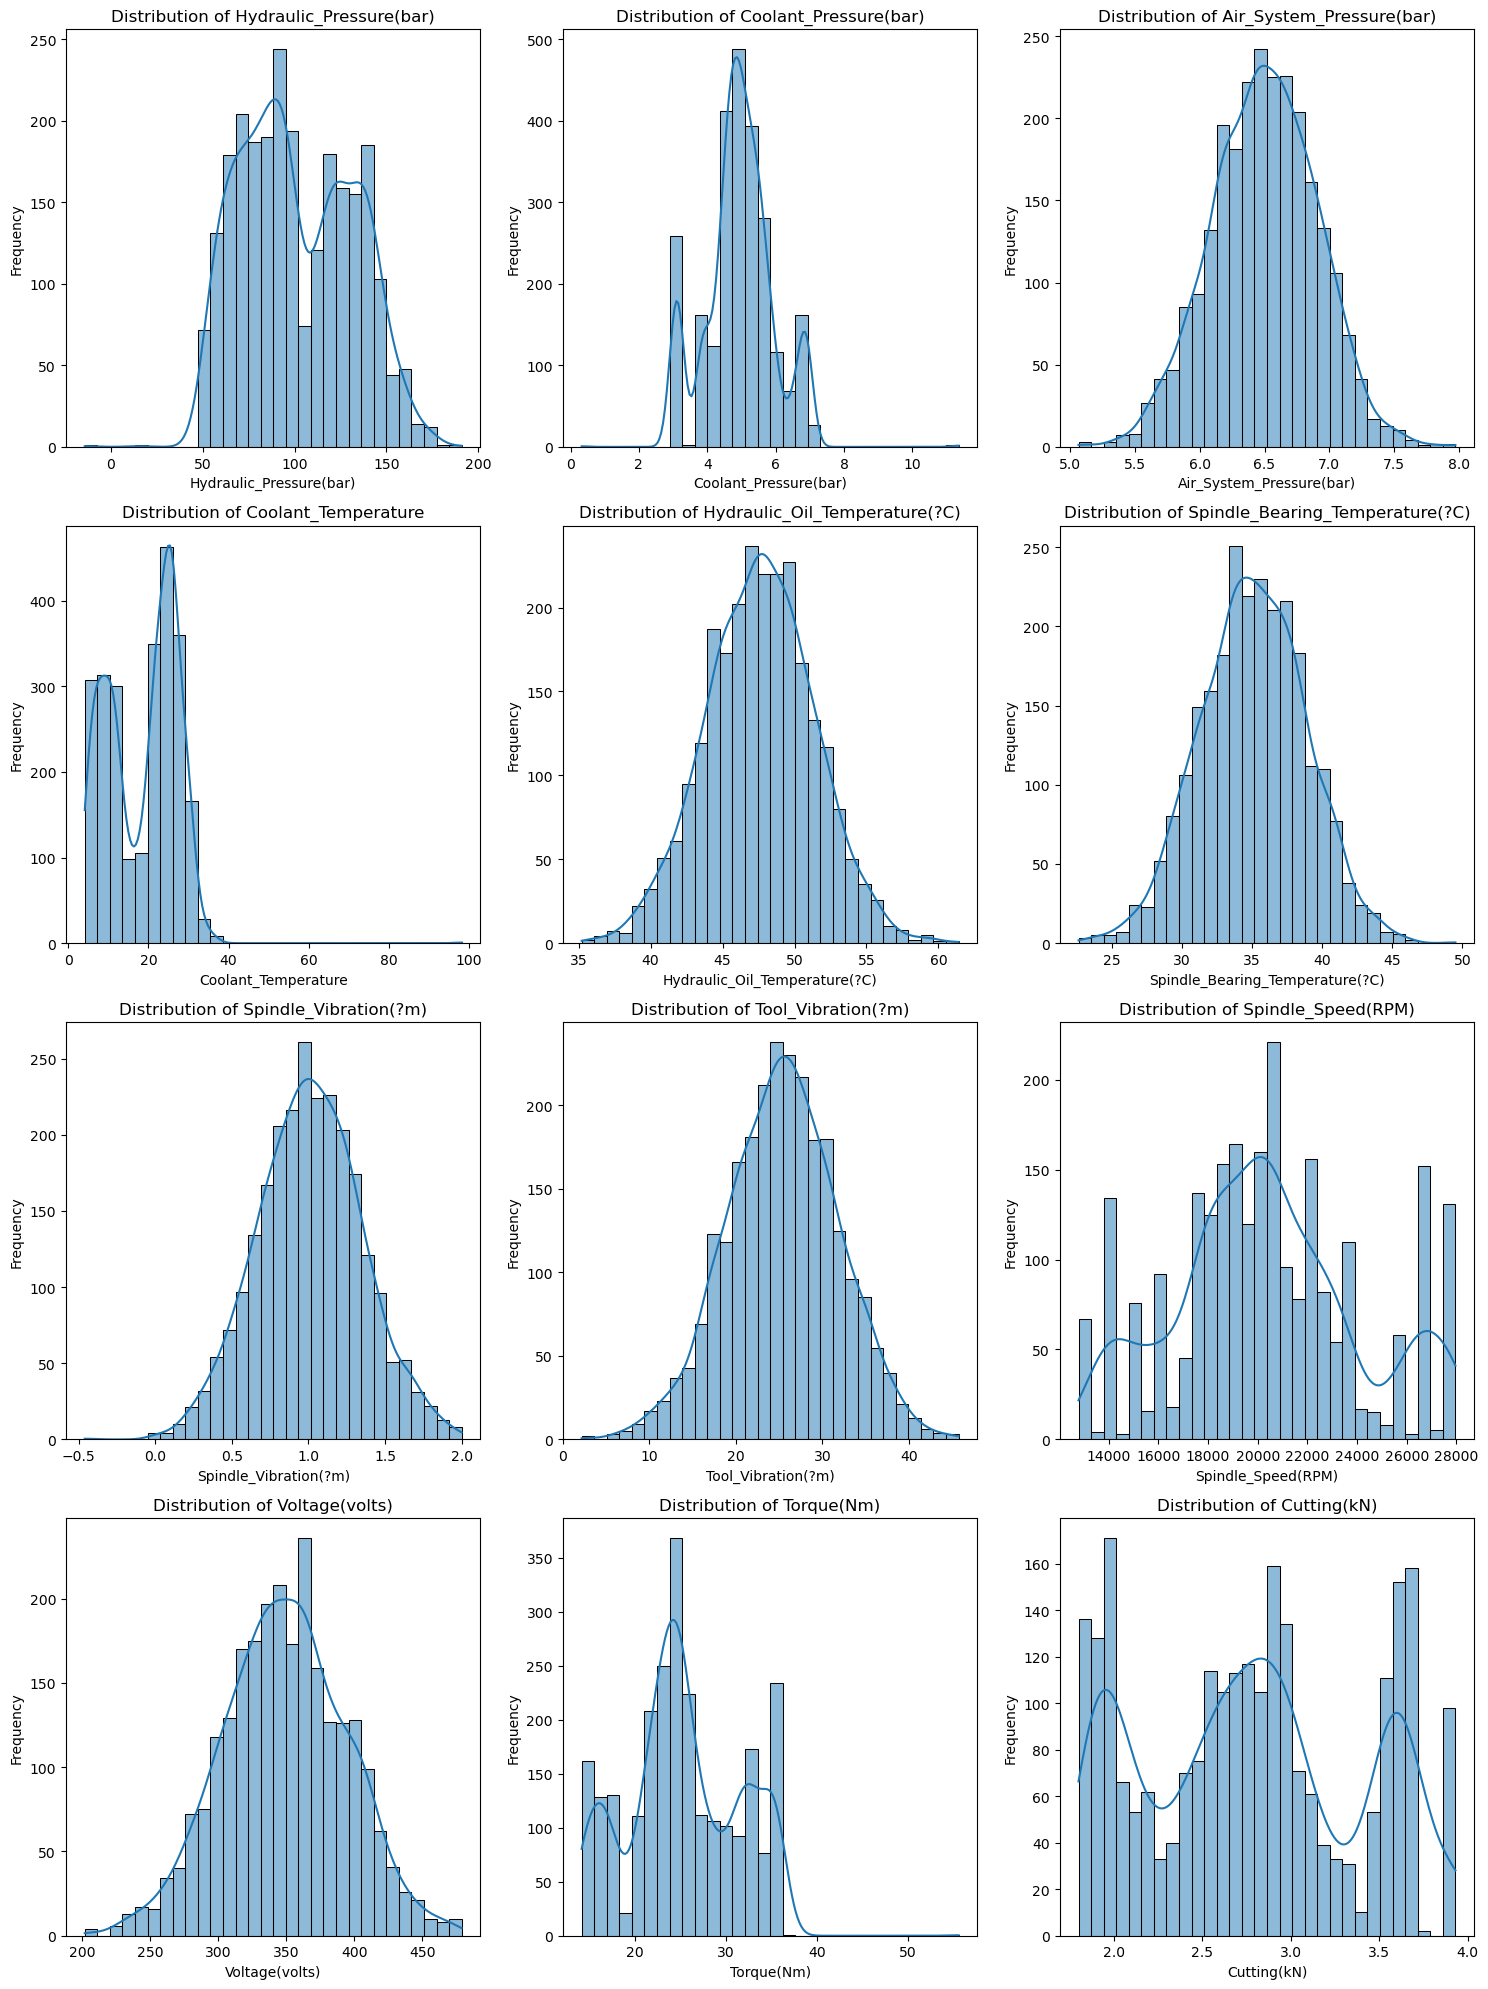

In [85]:
# Plot the distribution of Hydraulic Pressure
import math

# Select numeric columns and exclude 'Month', 'Day', 'Year'
exclude_cols = ['Month', 'Day', 'Year']
numeric_columns = [col for col in df.select_dtypes(include=['number']).columns if col not in exclude_cols]

# Calculate grid size (rows & cols)
num_plots = len(numeric_columns)
cols = 3  # Fixed number of columns
rows = math.ceil(num_plots / cols)  # Calculate required rows dynamically

# Plot histograms
plt.figure(figsize=(15, 5 * rows))  # Adjust figure height based on rows
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)  # Dynamically allocate subplots
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout
plt.show()

Business Insights---Conclusion: The bar plots for the readings of the numeric columns suggest their deviation from the normal distribution behaviour, indicating the presence of some critical issues that need to be fixed to ensure the least deviation from normal readings.
Few numeric columns suggest a significant deviation from normal behaviour, evident from their bar plots.
Few such examples are:Hydraulic Pressure, Coolant Temperature, Spindle Speed, Torque, Cutting

4️⃣ Categorical Data Analysis

In [30]:
# Count the number of unique machine IDs
num_machines = df['Machine_ID'].nunique()
print(f'Number of unique machine IDs: {num_machines}')

# Count the number of unique assembly line numbers
num_assembly_lines = df['Assembly_Line_No'].nunique()
print(f'Number of unique assembly line numbers: {num_assembly_lines}')

# Count the number of downtime occurrences
num_downtime = df.shape[0]
print(f'Number of downtime occurrences: {num_downtime}')


Number of unique machine IDs: 3
Number of unique assembly line numbers: 3
Number of downtime occurrences: 2500


Downtime counts:
Machine_Failure       1265
No_Machine_Failure    1235
Name: Downtime, dtype: int64


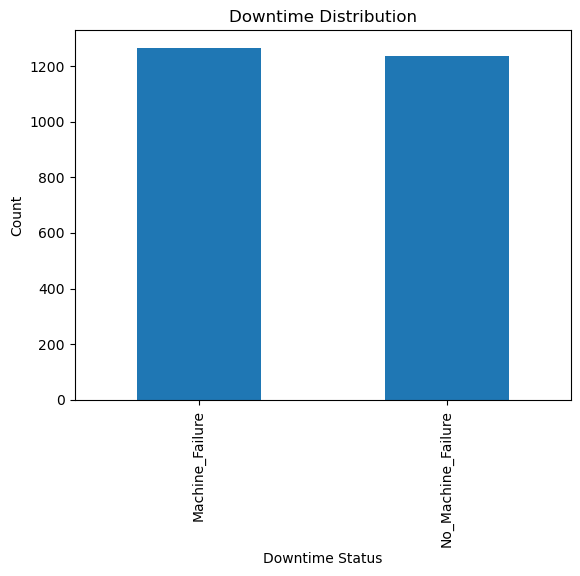

In [99]:
# Count the instances of each value
downtime_counts = df['Downtime'].value_counts()
print(f'Downtime counts:\n{downtime_counts}')


# Plot the distribution
downtime_counts.plot(kind='bar', title='Downtime Distribution')
plt.xlabel('Downtime Status')
plt.ylabel('Count')
plt.show()


5️⃣ Relationship Between Features

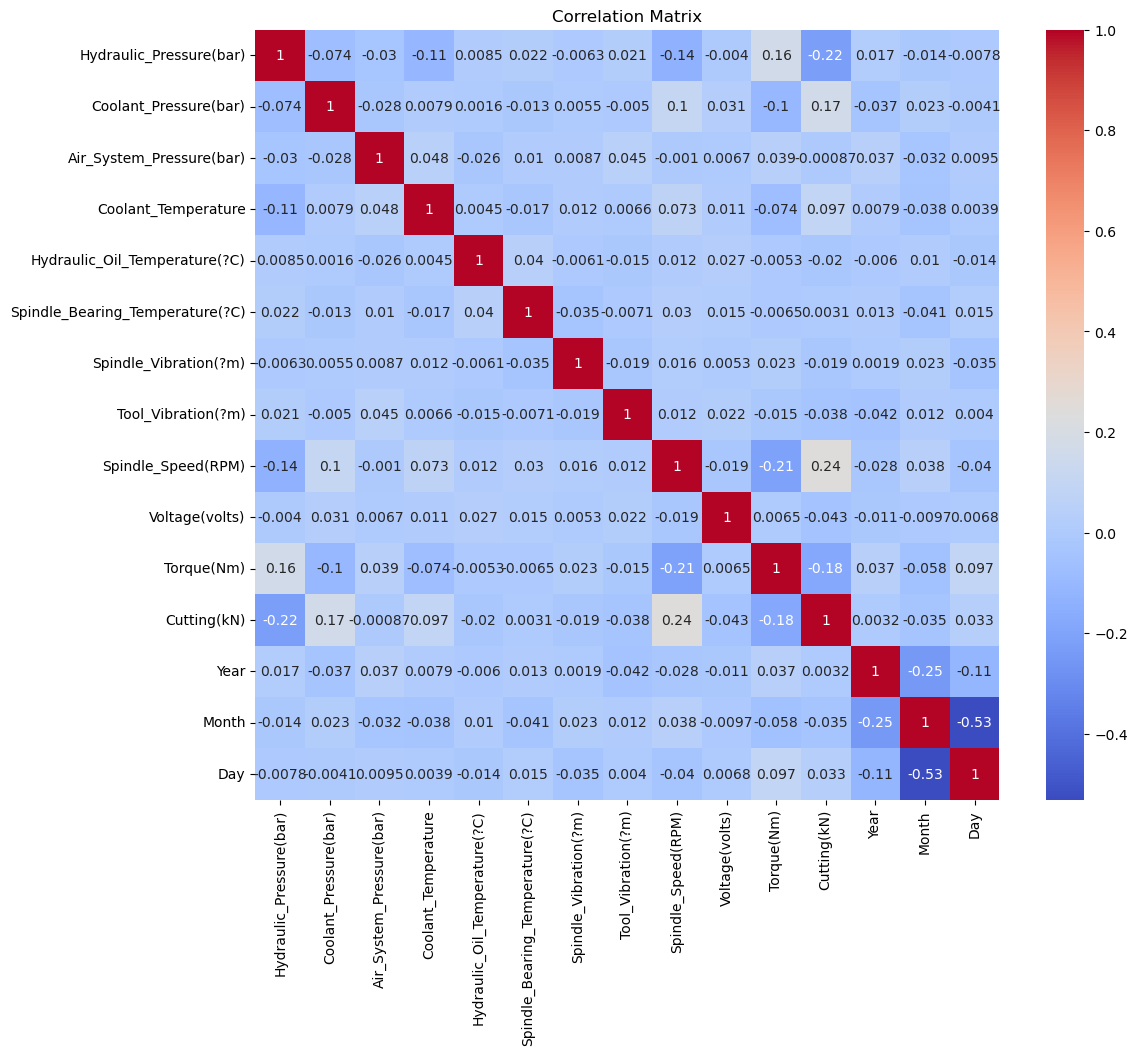

In [103]:
#Correlation between numerical variables.
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Statitical Insights: 
    Positive Correlation:Hydraulic pressure vs torque 0.16
    Negative Correlation:Cutting vs hydraulic pressure -0.22

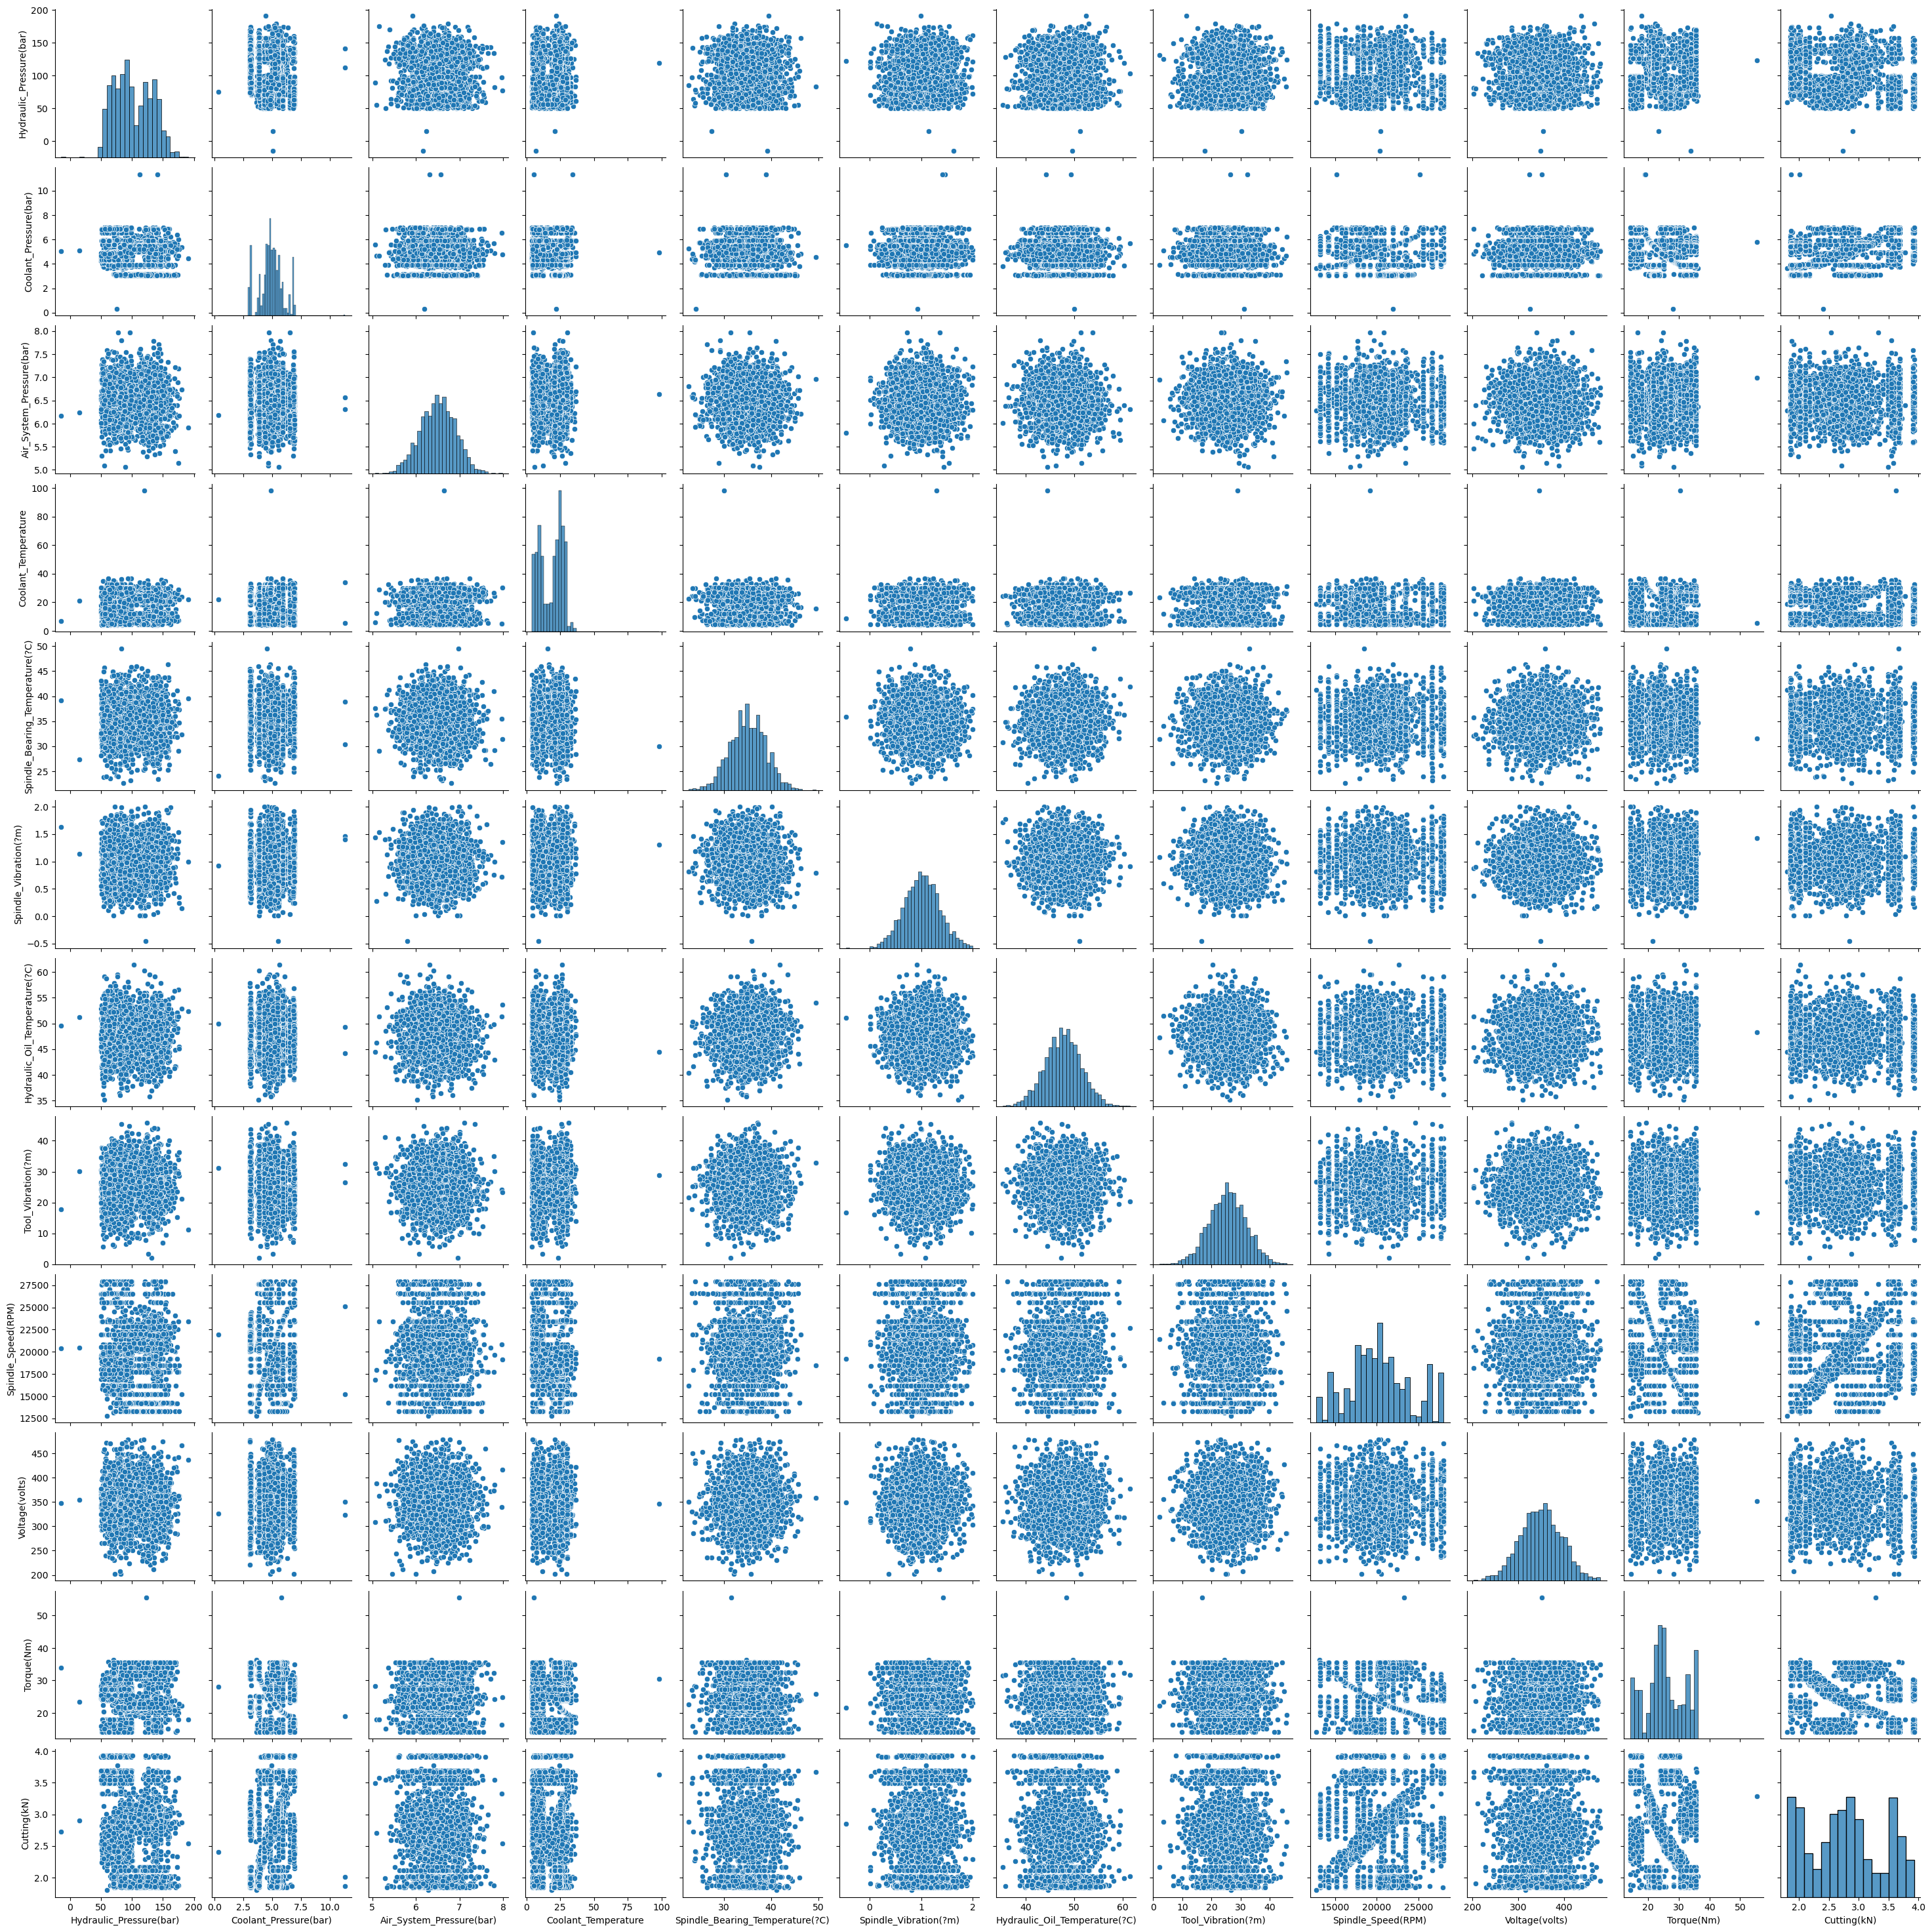

In [102]:
#Patterns and trends.
# Pairplot to see relationships between numerical variables
sns.pairplot(df[['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 
                   'Coolant_Temperature', 'Spindle_Bearing_Temperature(?C)', 'Spindle_Vibration(?m)', 
                   'Hydraulic_Oil_Temperature(?C)', 'Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 'Voltage(volts)', 
                   'Torque(Nm)', 'Cutting(kN)']])
plt.show()


In [36]:
# Calculate the failure rate
total_instances = downtime_counts.sum()
failure_rate = downtime_counts['Machine_Failure'] / total_instances
print(f'Failure Rate: {failure_rate * 100:.2f}%')

Failure Rate: 50.60%


In [87]:
# Calculate the failure rate
total_instances = downtime_counts.sum()
failure_rate = downtime_counts['No_Machine_Failure'] / total_instances
print(f'Success Rate: {failure_rate * 100:.2f}%')

Success Rate: 49.40%


Business insights-- Failure Rate Analysis:
The failure rate of the fuel pump manufacturing process is approximately 51.68% and the success rate (no failure) is about 48.32%.
This indicates that just over half of the manufacturing instances result in machine failure, also highlighting the pressing need for process optimization.

In [93]:
#Helps in setting benchmarks for preventive maintenance and improving efficiency.
# Define a benchmark based on Mean ± Standard Deviation
benchmark_low = df["Hydraulic_Pressure(bar)"].mean() - df["Hydraulic_Pressure(bar)"].std()
benchmark_high = df["Hydraulic_Pressure(bar)"].mean() + df["Hydraulic_Pressure(bar)"].std()

In [97]:
# Machines outside this range
outliers = df[(df["Hydraulic_Pressure(bar)"] < benchmark_low) | (df["Hydraulic_Pressure(bar)"] > benchmark_high)]
total_count = len(df)

print(f"Number of Machines Outside Benchmark: {len(outliers)}")
print(f"Percentage: {(len(outliers) / total_count) * 100:.2f}%")

Number of Machines Outside Benchmark: 1017
Percentage: 40.68%


Businesss Insight: It means 40.68% of machines are operating outside the safe hydraulic pressure range, signaling a need for corrective actions to improve efficiency, reliability, and cost-effectiveness.

# <b> <span style='color:#F86246'>|</span> GRAPH №1</b>

 Box Plot for Outlier Detection

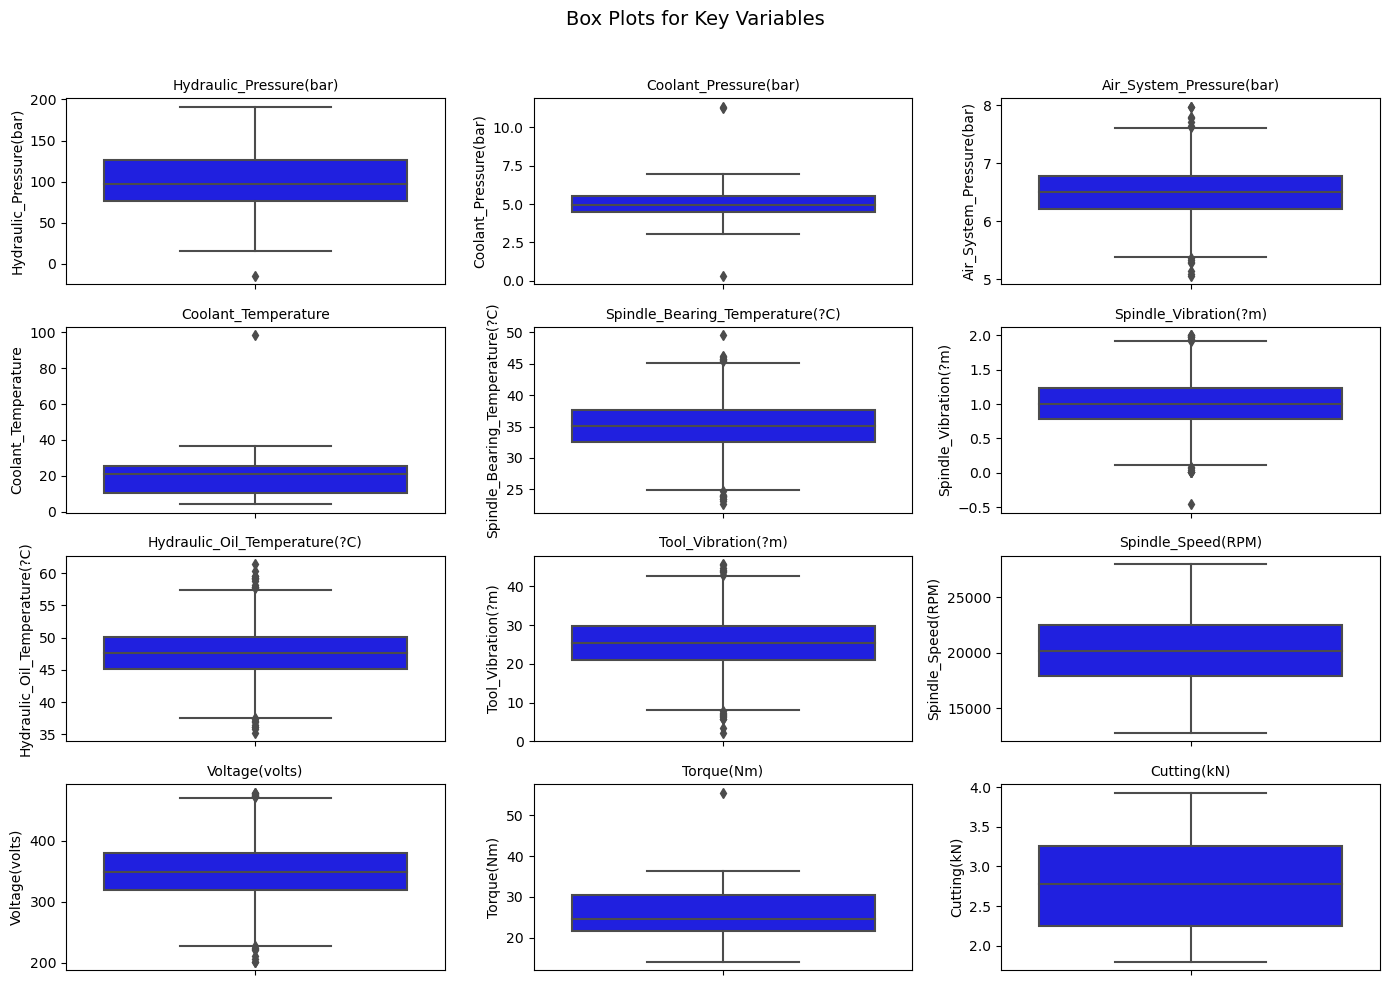

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# List of key variables to visualize
columns = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 
           'Coolant_Temperature', 'Spindle_Bearing_Temperature(?C)', 'Spindle_Vibration(?m)', 
           'Hydraulic_Oil_Temperature(?C)', 'Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 
           'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 10))  # Adjust grid size
fig.suptitle("Box Plots for Key Variables", fontsize=14)

# Plot each variable in a separate subplot
for i, col in enumerate(columns):
    row, col_idx = divmod(i, 3)  # Calculate row & column index
    sns.boxplot(y=df[col], ax=axes[row, col_idx], color='blue')  # Plot boxplot
    axes[row, col_idx].set_title(col, fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Conclusion: Avoid Pressure Spikes in Hydraulic & Coolant Systems

Trend Analysis Over Time

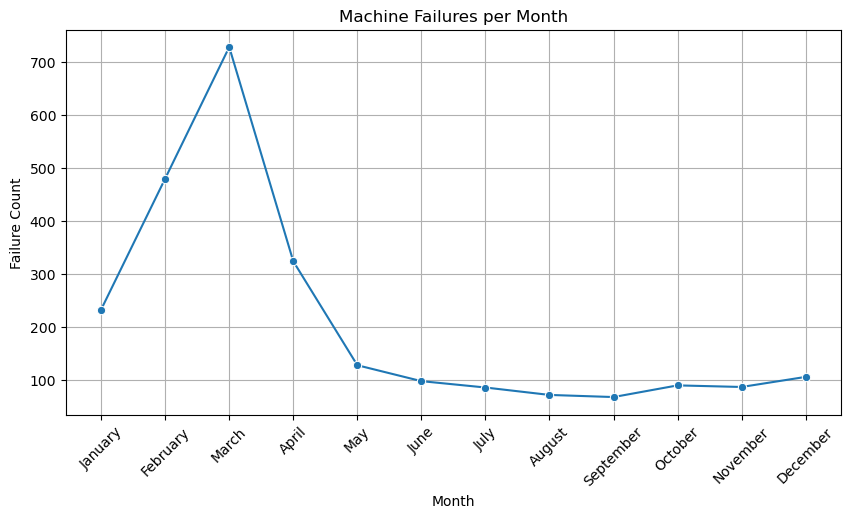

In [106]:
import calendar

# Assuming 'Date' column exists
df['Date'] = pd.to_datetime(df['Date'])

# Extract month number and name
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()

# Group by month and count failures
monthly_failures = df.groupby('Month_Name').size()

# Sort the index by month order
monthly_failures = monthly_failures.reindex(calendar.month_name[1:])  # Ensure correct month order

# Plot with month names on x-axis
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_failures.index, y=monthly_failures.values, marker="o")

plt.title("Machine Failures per Month")
plt.xlabel("Month")
plt.ylabel("Failure Count")
plt.xticks(rotation=45)  # Rotate for better visibility
plt.grid()
plt.show()

Business Insight: Need more data mainly in the months of December, June, and November, followed by January and May, for better analysis.Increase maintenance in February, March, and April, especially in early summer months.

Statistical Insights: March, Feb, and April have the highest number of machine failures.

# <b> <span style='color:#F86246'>|</span> Resource Allocation & Utilization</b>

In [27]:
# Convert Machine_ID to string if it's not already
df['Machine_ID'] = df['Machine_ID'].astype(str)


Machines Usage:
Makino-L1-Unit1-2013    874
Makino-L3-Unit1-2015    818
Makino-L2-Unit1-2015    808
Name: Machine_ID, dtype: int64


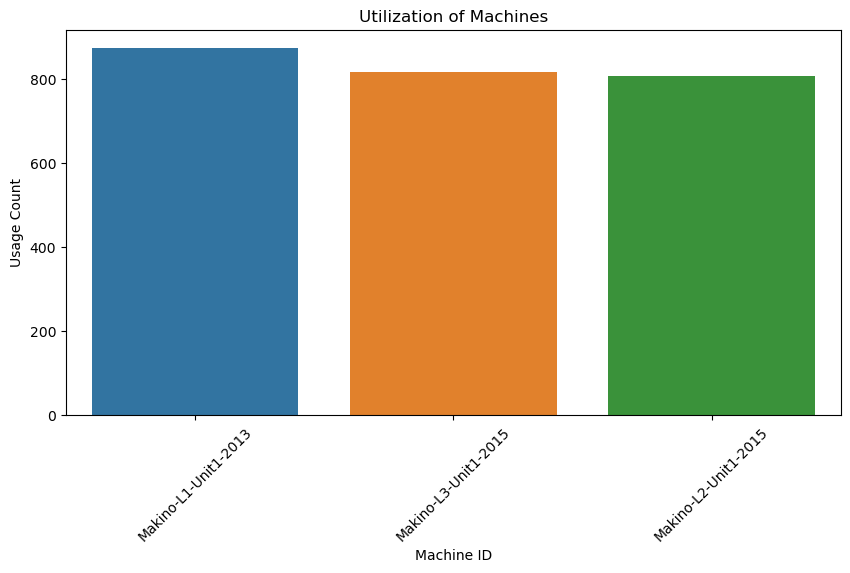

In [114]:
# Count the frequency of each machine usage
machine_usage = df["Machine_ID"].value_counts()

#most used machines
print("Machines Usage:")
print(machine_usage.head(5))

# Plot machine usage
plt.figure(figsize=(10,5))
sns.barplot(x=machine_usage.index[:10], y=machine_usage.values[:10])
plt.xlabel("Machine ID")
plt.ylabel("Usage Count")
plt.title("Utilization of Machines")
plt.xticks(rotation=45)
plt.show()


# <b> <span style='color:#F86246'>|</span> GRAPH №3,4</b>

In [115]:
assembly_line_usage = df["Assembly_Line_No"].value_counts()

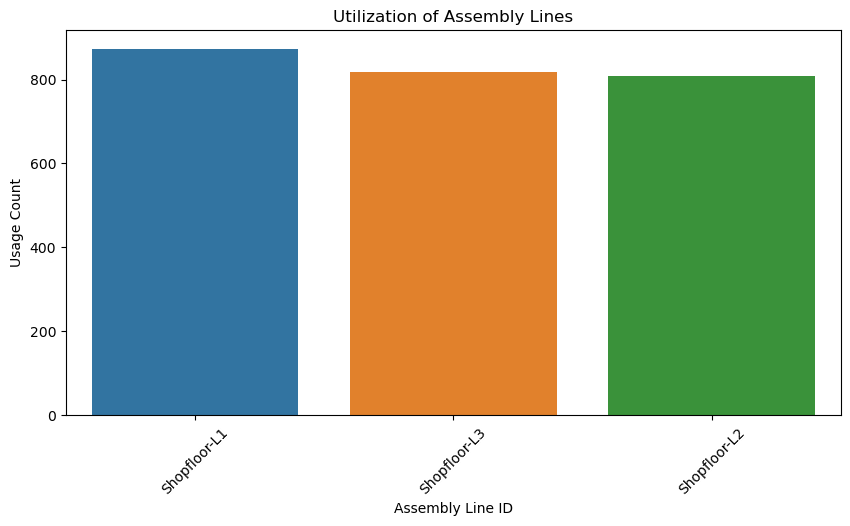

In [117]:
# Plot assembly line usage
plt.figure(figsize=(10,5))
sns.barplot(x=assembly_line_usage.index[:10], y=assembly_line_usage.values[:10])
plt.xlabel("Assembly Line ID")
plt.ylabel("Usage Count")
plt.title("Utilization of Assembly Lines")
plt.xticks(rotation=45)
plt.show()


Conclusion: The most common machine (Makino-L1-Unit1-2013) and assembly line (Shopfloor-L1) indicate where most operations are focused.Ensure these are well-maintained and possibly consider expanding capacity.

Failures per Unit:
Shopfloor-L1    454
Shopfloor-L3    415
Shopfloor-L2    396
Name: Assembly_Line_No, dtype: int64


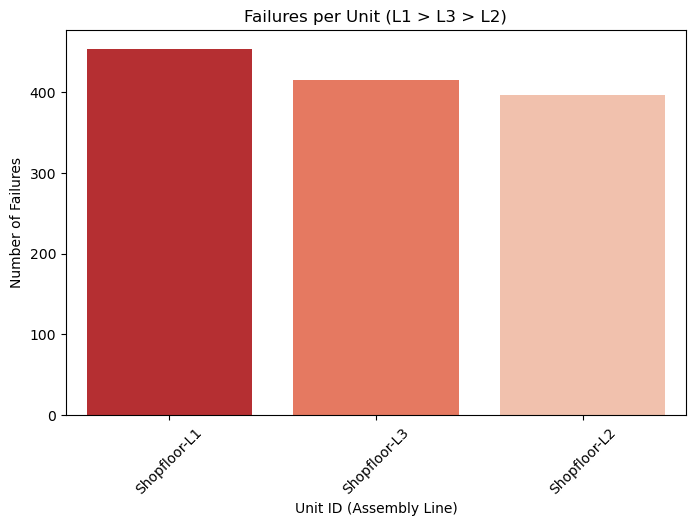

In [124]:
# Ensure "Downtime" column exists and contains expected values
if "Downtime" in df.columns and df["Downtime"].isin(["Machine_Failure"]).any():
    # Count failures per unit (Assembly Line)
    unit_failures = df[df["Downtime"] == "Machine_Failure"]["Assembly_Line_No"].value_counts()

    # Sorting values to ensure order: L1 > L3 > L2 (if present)
    unit_failures = unit_failures.sort_values(ascending=False)

    # Display failures per unit
    print("Failures per Unit:")
    print(unit_failures)

    # Plot the failures for visualization
    plt.figure(figsize=(8, 5))
    sns.barplot(x=unit_failures.index, y=unit_failures.values, palette="Reds_r")
    plt.xlabel("Unit ID (Assembly Line)")
    plt.ylabel("Number of Failures")
    plt.title("Failures per Unit (L1 > L3 > L2)")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No machine failures found in the dataset.")


Conclusion: L1 unit shows the most failures, followed by L3 and L2. 

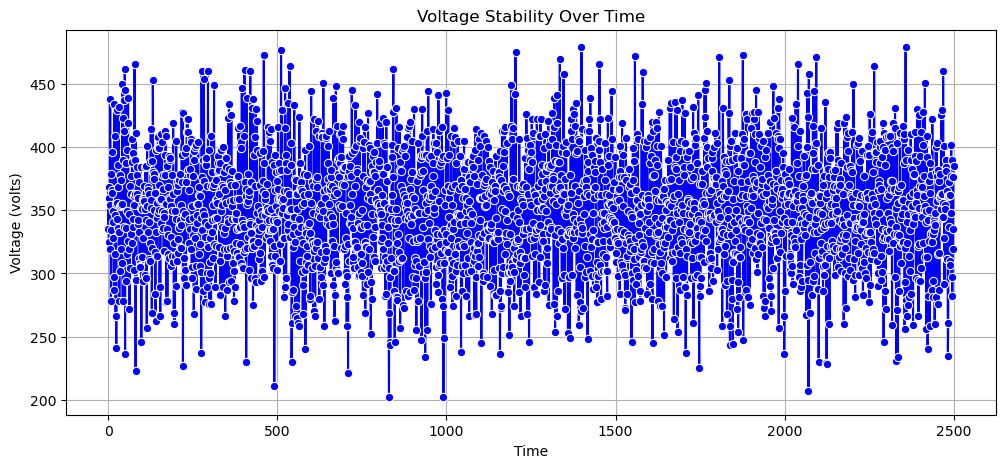

In [127]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=df.index, y=df["Voltage(volts)"], marker="o", color="blue")

plt.xlabel("Time")
plt.ylabel("Voltage (volts)")
plt.title("Voltage Stability Over Time")
plt.grid()
plt.show()

Conclusion: Ensure stable voltage supply to improve efficiency and reduce costs.

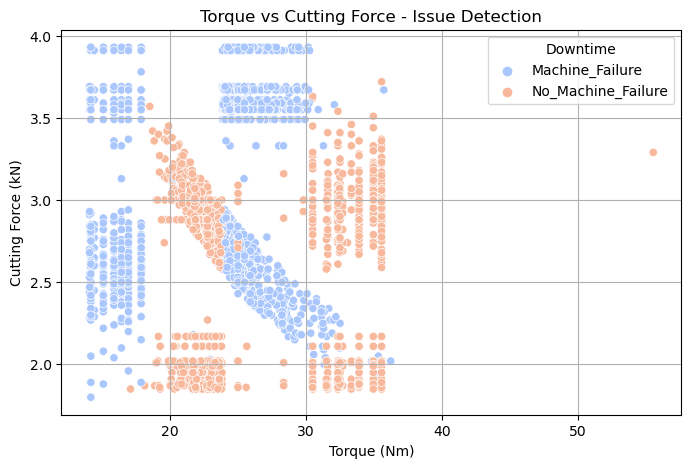

In [130]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Torque(Nm)"], y=df["Cutting(kN)"], hue=df["Downtime"], palette="coolwarm")

plt.xlabel("Torque (Nm)")
plt.ylabel("Cutting Force (kN)")
plt.title("Torque vs Cutting Force - Issue Detection")
plt.grid()
plt.show()

Conclusion: Monitor torque and cutting force for potential issues.